### BUILDING COMPLEX MODEL USING FUNCTIONAL API

+ non-sequential API is a Wide and Deep neural network.
+ It connects all part of the inputs directly to the output layers.
+ This architecture make possible to learn both deep patterns(using deep path) and simple rules(using short path).
+ The regular MLP forces all the data to flow through the full stack of layers. thus simple patterns may end up being distorted by the sequence of transformations.

BUILDING THE NEURAL NETWORK TO SOLVE CALIFORNIA HOUSING PRICE PREDICTION.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
## fetch the data.
housing = fetch_california_housing()
housing.keys()
# housing.data
# housing.target
# housing.target_names
# housing.feature_names
# housing.DESCR
# columns = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
data = pd.DataFrame(housing.data, columns = housing.feature_names)
print(data.head())

## split the data to trainig and testing and validation sets.
print("============Splitting data to Training and Testing Sets===============")
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print("============Splitting data to Training and Validation Sets===============")
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print("=============scale the Data using the Standard Scaler================")
## initialize the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
============Splitting data to Training and Testing Sets===============
(15480, 8)
(5160, 8)
(15480,)
(5160,)
============Splitting data to Training and Validation Sets===============
(11610, 8)
(3870, 8)
(11610,)
(3870,)
=============scale the Data using the Standard Scaler================


In [6]:
## model development
## step 1 : - defining an input layer.
## specify the input shape and dtypes
## a modelmay actually have multiple inputs.
input_ = keras.layers.Input(shape = X_train.shape[1:])
## step2 :- Create a Dense layer with 30 neurons(hidden 1)
## activation = "relu"
## end of it pass the input as a Function.
## this is why this model is functional API method.
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
## step 3 :- Create the second dense layer with 30 neurons.
## activation = "relu"
## pass the first hidden layer as the function to this.
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
## step 4 :- Create a Concatenate Layer.
## pass the input and hidden2 layer to that layer.
concat = keras.layers.Concatenate()([input_, hidden2])
## step 5 :- create an output layer with single neuron.
## no activation function.
## passing the result of concat by end of it as a function.
output = keras.layers.Dense(1)(concat)
## step 6 :- Lastly create the Keras Model.
## specify whch input and output to use
model = keras.Model(inputs = [input_], outputs = [output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_7[0][0]']          

In [7]:
## compile the model.
model.compile(
        loss = "mean_squared_error",
        optimizer = "sgd",
        metrics = "accuracy"
)

In [8]:
## train the model
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 20,
                    validation_data = (X_valid, y_valid),
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0035 - accuracy: 0.0028 - val_loss: 0.5259 - val_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.0029 - val_loss: 1.4507 - val_accuracy: 0.0023
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 5.4509 - accuracy: 0.0028 - val_loss: 0.6915 - val_accuracy: 0.0028
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 2.5840e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+0

In [9]:
## evaluate the model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00


In [10]:
## predict the model
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 103ms/step


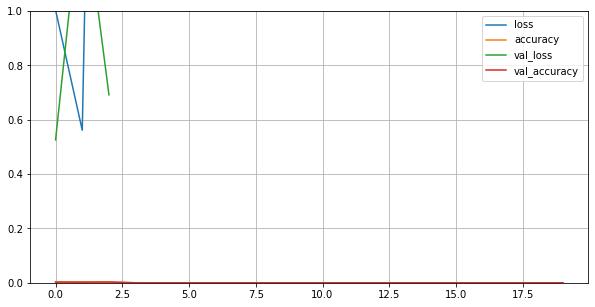

In [11]:
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The output is not Promising.
+ This model cannot be used for the Purpose.